In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, roc_curve, confusion_matrix

In [2]:
letter = pd.read_csv(r'C:\Users\purav\OneDrive\Desktop\Comparative Evaluation of Anomaly Detection Algorithms\Comparative-Evaluation-of-Anomaly-Detection-Algorithms\Datasets\letter-unsupervised-ad.csv', header = None)

In [3]:
letter

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,6.0,10.0,5.0,6.0,3.0,10.0,6.0,4.0,6.0,14.0,...,0.0,8.0,14.0,6.0,6.0,0.0,10.0,2.0,7.0,n
1,0.0,6.0,0.0,4.0,0.0,7.0,7.0,4.0,4.0,7.0,...,0.0,7.0,13.0,6.0,8.0,0.0,8.0,1.0,7.0,n
2,4.0,7.0,5.0,5.0,3.0,7.0,8.0,2.0,7.0,7.0,...,1.0,7.0,7.0,6.0,8.0,0.0,8.0,2.0,8.0,n
3,1.0,6.0,1.0,4.0,2.0,7.0,7.0,0.0,7.0,7.0,...,1.0,8.0,7.0,6.0,8.0,0.0,8.0,3.0,8.0,n
4,1.0,2.0,1.0,3.0,1.0,7.0,7.0,1.0,7.0,7.0,...,1.0,8.0,7.0,6.0,9.0,0.0,8.0,3.0,8.0,n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,1.0,6.0,0.0,4.0,0.0,7.0,7.0,4.0,4.0,7.0,...,10.0,4.0,7.0,12.0,8.0,2.0,10.0,0.0,8.0,o
1596,5.0,8.0,6.0,7.0,6.0,6.0,9.0,5.0,7.0,8.0,...,4.0,14.0,9.0,6.0,8.0,0.0,8.0,8.0,8.0,o
1597,4.0,9.0,4.0,4.0,2.0,7.0,10.0,2.0,5.0,13.0,...,7.0,5.0,10.0,8.0,7.0,3.0,8.0,3.0,8.0,o
1598,6.0,10.0,6.0,7.0,5.0,5.0,11.0,3.0,7.0,11.0,...,2.0,3.0,12.0,6.0,5.0,2.0,9.0,8.0,8.0,o


In [4]:
shuffled_df = letter.sample(frac=1).reset_index(drop=True)
shuffled_df

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,1.0,8.0,1.0,6.0,1.0,7.0,7.0,0.0,8.0,7.0,...,0.0,8.0,14.0,6.0,6.0,0.0,8.0,1.0,7.0,n
1,3.0,5.0,4.0,3.0,2.0,5.0,12.0,3.0,7.0,11.0,...,4.0,6.0,12.0,9.0,3.0,1.0,11.0,2.0,4.0,n
2,7.0,9.0,9.0,5.0,4.0,12.0,2.0,5.0,2.0,11.0,...,2.0,4.0,9.0,7.0,9.0,7.0,6.0,2.0,8.0,n
3,6.0,9.0,9.0,6.0,10.0,10.0,3.0,3.0,2.0,9.0,...,2.0,5.0,9.0,5.0,7.0,8.0,6.0,2.0,8.0,n
4,5.0,9.0,8.0,7.0,8.0,8.0,7.0,6.0,5.0,6.0,...,3.0,4.0,9.0,7.0,8.0,6.0,5.0,1.0,8.0,n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,6.0,10.0,5.0,6.0,3.0,10.0,6.0,4.0,6.0,14.0,...,4.0,4.0,7.0,6.0,8.0,0.0,8.0,0.0,8.0,n
1596,1.0,4.0,2.0,3.0,1.0,7.0,8.0,0.0,7.0,13.0,...,3.0,7.0,11.0,12.0,12.0,4.0,7.0,4.0,5.0,o
1597,6.0,14.0,5.0,8.0,3.0,6.0,10.0,2.0,6.0,11.0,...,4.0,8.0,8.0,7.0,9.0,3.0,8.0,8.0,6.0,n
1598,4.0,7.0,5.0,5.0,3.0,7.0,7.0,12.0,1.0,7.0,...,3.0,5.0,9.0,4.0,7.0,10.0,6.0,2.0,8.0,n


In [5]:
df = pd.DataFrame(shuffled_df.iloc[:, :-1].values)

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
ss = StandardScaler()
df = pd.DataFrame(ss.fit_transform(df))

In [8]:
df

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,-1.227428,0.298236,-1.345121,0.337320,-0.886310,-0.130328,-0.446281,-1.186299,1.342390,-0.615093,...,-0.082107,-1.190722,1.316819,2.163214,-0.572988,-0.945902,-0.936598,0.003781,-0.564241,-0.187920
1,-0.318853,-0.614149,-0.244255,-1.045376,-0.501481,-1.480009,1.374344,-0.196858,0.862644,0.977380,...,1.747569,0.156153,0.352999,1.371644,0.754397,-2.798342,-0.656651,1.516130,-0.115986,-2.187955
2,1.498297,0.602364,1.590522,-0.123578,0.268178,3.243872,-2.266905,0.462770,-1.536087,0.977380,...,-0.448042,-0.517284,-0.610821,0.184288,-0.130526,0.906538,1.023032,-1.004452,-0.115986,0.478758
3,1.044010,0.602364,1.590522,0.337320,2.577153,1.894192,-1.902780,-0.196858,-1.536087,0.181144,...,-0.813977,-0.517284,-0.128911,0.184288,-1.015449,-0.328422,1.302979,-1.004452,-0.115986,0.478758
4,0.589722,0.602364,1.223567,0.798219,1.807495,0.544512,-0.446281,0.792583,-0.096849,-1.013211,...,-0.813977,-0.180565,-0.610821,0.184288,-0.130526,0.289058,0.743085,-1.508568,-0.564241,0.478758
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,1.044010,0.906493,0.122701,0.337320,-0.116651,1.894192,-0.810406,0.132956,0.382897,2.171735,...,-0.448042,0.156153,-0.610821,-0.607283,-0.572988,0.289058,-0.936598,0.003781,-1.012496,0.478758
1596,-1.227428,-0.918278,-0.978165,-1.045376,-0.886310,-0.130328,-0.082156,-1.186299,0.862644,1.773616,...,0.283829,-0.180565,0.834909,0.975858,2.081782,2.758978,0.183190,-0.500335,0.780524,-1.521277
1597,1.044010,2.123007,0.122701,1.259118,-0.116651,-0.805169,0.646094,-0.526671,0.382897,0.977380,...,-0.082107,0.156153,1.316819,-0.211498,-0.130526,0.906538,-0.096757,0.003781,2.573543,-0.854598
1598,0.135434,-0.005892,0.122701,-0.123578,-0.116651,-0.130328,-0.446281,2.771465,-2.015834,-0.615093,...,-0.813977,-0.180565,-0.128911,0.184288,-1.457911,-0.328422,1.862873,-1.004452,-0.115986,0.478758


In [9]:
from sklearn.decomposition import PCA

In [10]:
pca = PCA()
pca.fit(df)
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
num_components = np.argmax(cumulative_variance >= 0.95) + 1
print(num_components)

20


In [11]:
pca = PCA(n_components=20)
new_df = pca.fit_transform(df)

In [12]:
new_df

array([[-2.47057346, -0.96579295, -0.884768  , ..., -0.31862829,
        -0.14649117,  0.2035529 ],
       [-4.46211872,  2.34885028,  0.02553301, ...,  0.35800202,
         0.2000513 , -0.14288897],
       [ 4.63929484, -1.56834309,  0.88892203, ...,  0.40247168,
         0.45566752,  0.62932599],
       ...,
       [-0.16351648,  3.45019365,  0.62758493, ..., -1.11332073,
         0.31605155,  0.26184192],
       [ 3.24055357, -1.09267413, -1.10829685, ...,  0.1717406 ,
        -0.43891603,  0.26611838],
       [-2.84630383,  2.13387984,  3.34224767, ...,  0.15033529,
         0.646191  , -0.26290927]])

In [13]:
df = pd.DataFrame(new_df)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-2.470573,-0.965793,-0.884768,2.418019,1.426384,-0.775764,-0.279387,1.166035,-0.236690,-0.510821,0.336469,0.146142,-0.454275,-0.543607,-0.673819,-0.665128,-0.509800,-0.318628,-0.146491,0.203553
1,-4.462119,2.348850,0.025533,-1.883345,-0.057087,-2.925560,-0.115364,-0.208631,-0.167457,-0.867436,-0.508969,0.492536,0.142885,0.165842,0.128953,-0.126213,-0.230286,0.358002,0.200051,-0.142889
2,4.639295,-1.568343,0.888922,1.744038,0.443353,-1.163373,2.908430,0.008342,-1.525316,0.957118,0.033554,-1.622665,1.019841,0.004362,-0.331736,0.823427,-0.066083,0.402472,0.455668,0.629326
3,5.434154,1.321939,0.083293,2.128147,0.050250,-1.056287,0.412207,1.176010,-0.569324,0.276491,-0.274556,-1.653099,0.502348,-0.380359,-0.572685,0.407992,0.503964,0.951900,0.340783,-0.765177
4,2.536397,-1.111083,2.454993,-0.589231,1.259582,-0.430481,-0.786411,0.327217,0.056428,0.729192,0.799965,-0.514868,-0.673620,-0.228059,-0.113976,0.156887,-0.340844,0.424183,-0.271880,-0.105055
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,-0.393229,-3.293493,3.933961,1.381107,0.027906,-0.947079,1.193681,-1.371449,-0.263164,0.233558,-1.092708,-0.494580,0.248561,1.789014,2.031689,-0.548518,-0.025211,-0.216565,-0.378330,0.023362
1596,-1.419746,0.984896,-2.284886,0.191523,-0.948076,-0.023555,4.019663,0.342865,-0.219594,1.367100,2.456644,0.766756,-0.856188,-0.687372,0.432085,-1.011851,-0.611906,-1.281051,0.587454,0.139724
1597,-0.163516,3.450194,0.627585,1.905471,-1.279883,0.094114,-0.445151,-1.756055,0.555276,1.845049,0.138230,1.137524,-0.166437,-0.705063,-0.531294,-0.028729,-0.716964,-1.113321,0.316052,0.261842
1598,3.240554,-1.092674,-1.108297,-1.434818,0.698318,-0.858136,-2.441003,-0.541345,-1.101628,1.049411,0.442994,-0.541133,0.976206,0.517419,0.290895,0.086982,0.217112,0.171741,-0.438916,0.266118


Base Case of Algorithms

In [14]:
from pyod.models.lof import LOF
from pyod.models.cblof import CBLOF
from pyod.models.cof import COF
from pyod.models.knn import KNN

In [15]:
y = shuffled_df.iloc[:,-1]
y = pd.DataFrame(y.replace({'o':1, 'n':0}))

In [16]:
y

,32
0,0
1,0
2,0
3,0
4,0
...,...
1595,0
1596,1
1597,0
1598,0


Performance over multiple parameters

c:\Users\purav\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\purav\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\purav\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\purav\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

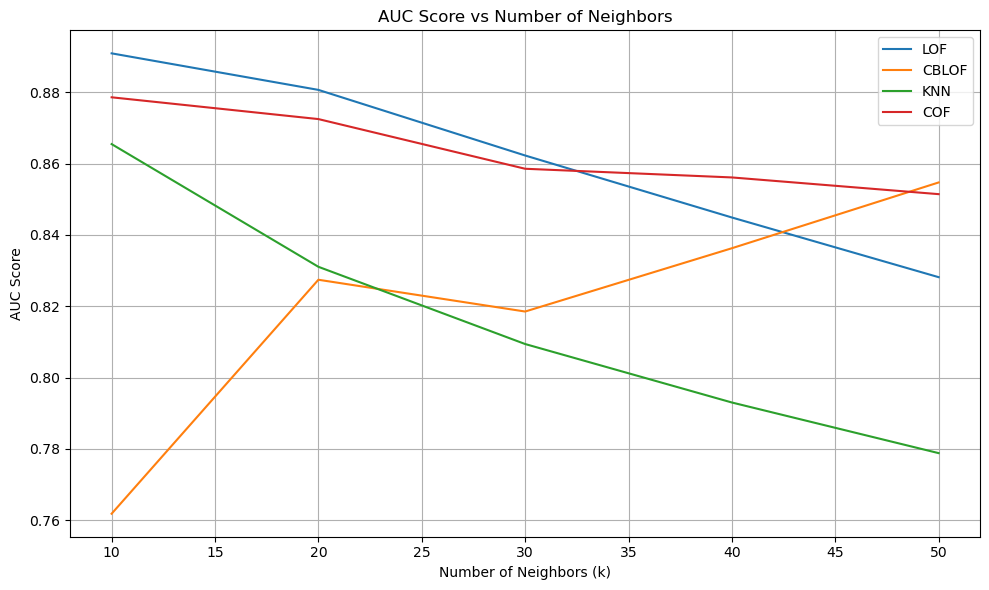

In [17]:
auc_scores_lof = []
auc_scores_cblof = []
auc_scores_knn = []
auc_scores_cof = []
n_neighbors_list = [10,20,30,40,50]
accuracy_scores_lof = []
accuracy_scores_cblof = []
accuracy_scores_knn = []
accuracy_scores_cof = []

# Evaluate AUC scores for LOF, CBLOF, and KNN over multiple neighbors
for n_neighbors in n_neighbors_list:
    # LOF
    lof_model = LOF(n_neighbors=n_neighbors)
    lof_model.fit(df)
    y_scores_lof = lof_model.decision_function(df)
    lof_pred = lof_model.labels_
    auc_lof = roc_auc_score(y, y_scores_lof)

    auc_scores_lof.append(auc_lof)
    accuracy_lof = accuracy_score(y, lof_pred)
    accuracy_scores_lof.append(accuracy_lof)

    cof_model = COF(n_neighbors=n_neighbors)
    cof_model.fit(df)
    y_scores_cof = cof_model.decision_function(df)
    cof_pred = cof_model.labels_
    auc_cof = roc_auc_score(y, y_scores_cof)

    auc_scores_cof.append(auc_cof)
    accuracy_cof = accuracy_score(y, cof_pred)
    accuracy_scores_cof.append(accuracy_cof)


    # CBLOF
    cblof_model = CBLOF(n_clusters=n_neighbors)
    cblof_model.fit(df)
    y_scores_cblof = cblof_model.decision_function(df)
    cblof_pred = cblof_model.labels_
    auc_cblof = roc_auc_score(y, y_scores_cblof)

    auc_scores_cblof.append(auc_cblof)
    accuracy_cblof = accuracy_score(y, cblof_pred)
    accuracy_scores_cblof.append(accuracy_cblof)
    
    # KNN
    knn_model = KNN(n_neighbors=n_neighbors)
    knn_model.fit(df)
    y_scores_knn = knn_model.decision_function(df)
    knn_pred = knn_model.labels_
    auc_knn = roc_auc_score(y, y_scores_knn)

    auc_scores_knn.append(auc_knn)
    accuracy_knn = accuracy_score(y, knn_pred)
    accuracy_scores_knn.append(accuracy_knn)

# Calculate mean AUC score for each model
mean_auc_lof = np.mean(auc_scores_lof)
mean_auc_cblof = np.mean(auc_scores_cblof)
mean_auc_knn = np.mean(auc_scores_knn)
mean_auc_cof = np.mean(auc_scores_cof)
mean_acc_lof = np.mean(accuracy_scores_lof)
mean_acc_cblof = np.mean(accuracy_scores_cblof)
mean_acc_knn = np.mean(accuracy_scores_knn)
mean_acc_cof = np.mean(accuracy_scores_cof)
plt.figure(figsize=(10, 6))

# Plot LOF AUC
plt.plot(n_neighbors_list, auc_scores_lof, label='LOF')

# Plot CBLOF AUC
plt.plot(n_neighbors_list, auc_scores_cblof, label='CBLOF')

# Plot KNN AUC
plt.plot(n_neighbors_list, auc_scores_knn, label='KNN')

plt.plot(n_neighbors_list, auc_scores_cof, label='COF')

# Add labels and title
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('AUC Score')
plt.title('AUC Score vs Number of Neighbors')
plt.legend()

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()

In [18]:
print("KNN auc",mean_auc_knn)
print("LOF auc",mean_auc_lof)
print("CBLOF auc",mean_auc_cblof)
print("COF auc",mean_auc_cof)

print("KNN acc",mean_acc_knn)
print("LOF acc",mean_acc_lof)
print("CBLOF acc",mean_acc_cblof)
print("COF acc",mean_acc_cof)



KNN auc 0.815546
LOF auc 0.8613800000000001
CBLOF auc 0.8197466666666667
COF auc 0.8634373333333333
KNN acc 0.8825
LOF acc 0.898
CBLOF acc 0.8825
COF acc 0.9025000000000001
